In [1]:
%matplotlib widget
from pyGCodeDecode import gcode_interpreter
import matplotlib.pyplot as plt
import numpy as np
# ipympl can be install via pip: "pip install ipympl"

In [2]:
anisoprint_A4 = {
    #general properties
    "nozzle_diam"   :   0.4,
    "filament_diam" :   1.75,
    
    #default settings
    "velocity"      :   35,
    "acceleration"  :   20,
    "jerk"          :   10,
    
    #axis max speeds
    "Vx"            :   80,
    "Vy"            :   80,
    "Vz"            :   80,
    "Ve"            :   25
    }

In [3]:
initial_position = True

new = gcode_interpreter.simulate(filename=r"test.gcode",printer=anisoprint_A4,initial_position=initial_position)

[##########] 100% of Planner Block Generation Done...
 >> pyGCodeDecode extracted 5 states from test.gcode and generated 4 plannerblocks. 
 Estimated time to travel all states with provided printer settings is 3.8049839335188214 seconds.


[##########] 100% of 3D Plot Done...
hello

Color


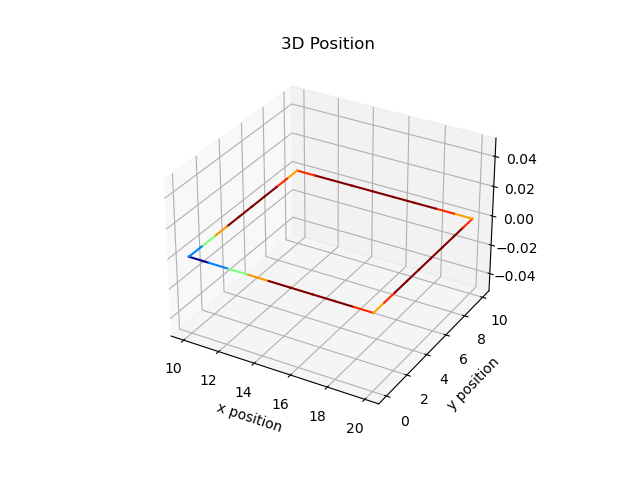

<Axes3DSubplot:title={'center':'3D Position'}, xlabel='x position', ylabel='y position'>

In [4]:
new.plot_3d_position(show=True)